In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tennis.csv')
data.head()

,outlook;temp;humidity;windy;play
0,sunny;hot;high;FALSE;no
1,sunny;hot;high;TRUE;no
2,overcast;hot;high;FALSE;yes
3,rainy;mild ;high;FALSE;yes
4,rainy;cool;normal;FALSE;yes


memisahkan kolom-kolom dalam DataFrame yang tergabung menjadi kolom-kolom terpisah dengan menggunakan tanda pemisah

---



In [16]:
import pandas as pd

# Membaca dataset dengan pemisah tanda semikolon
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tennis.csv', delimiter=';')

# Menampilkan beberapa baris pertama data
print(data.head(100))

     outlook   temp humidity  windy play
0      sunny    hot     high  False   no
1      sunny    hot     high   True   no
2   overcast    hot     high  False  yes
3      rainy  mild      high  False  yes
4      rainy   cool   normal  False  yes
5      rainy   cool   normal   True   no
6   overcast   cool   normal   True  yes
7      sunny  mild      high  False   no
8      sunny   cool   normal  False  yes
9      rainy  mild    normal  False  yes
10     sunny  mild    normal   True  yes
11  overcast  mild      high   True  yes
12  overcast    hot   normal  False  yes
13     rainy  mild      high   True   no


Import Libary DT


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
# Menampilkan daftar nama kolom dalam dataset
column_names = data.columns
print(column_names)


Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')


**Membaca kolom 'outlook'**

In [18]:
outlook_column = data['outlook']
print(outlook_column)

0        sunny
1        sunny
2     overcast
3        rainy
4        rainy
5        rainy
6     overcast
7        sunny
8        sunny
9        rainy
10       sunny
11    overcast
12    overcast
13       rainy
Name: outlook, dtype: object


In [19]:
temp_column = data['temp']
print(temp_column)

0       hot
1       hot
2       hot
3     mild 
4      cool
5      cool
6      cool
7     mild 
8      cool
9     mild 
10    mild 
11    mild 
12      hot
13    mild 
Name: temp, dtype: object


In [20]:
humidity_column = data['humidity']
print(humidity_column)

0       high
1       high
2       high
3       high
4     normal
5     normal
6     normal
7       high
8     normal
9     normal
10    normal
11      high
12    normal
13      high
Name: humidity, dtype: object


**Pengkodean Variabel Kategorikal:**

In [25]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan Label Encoding untuk 'outlook'
le = LabelEncoder()
data['outlook'] = le.fit_transform(data['outlook'])


# Mengubah 'windy' menjadi nilai biner
data['windy'] = data['windy'].astype(int)

label_encoder = LabelEncoder()
data['humidity'] = label_encoder.fit_transform(data['humidity'])
data['temp'] = label_encoder.fit_transform(data['temp'])
data['play'] = label_encoder.fit_transform(data['play'])

# Menampilkan beberapa baris pertama data setelah pengkodean
print(data.head(14))

    outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0


# outlook : 0 > overcast ; 1 > rainy ; 2 > sunny
# temp : 0 > cool ; 1 > hot ; 2 > mild
# humidity : 0 > high 1 > normal
# windy : 0 > false 1 > true
# play : 0 > no 1 > yes

**train test split 80:20**

In [49]:
from sklearn.model_selection import train_test_split

X = data.drop('play', axis=1)
y = data['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 11
Jumlah data uji: 3


**Pembuatan Model DT**

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

**Hasil Akurasi Model DT**

In [51]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)


Akurasi Model: 1.0


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

**CONFUSION MATRIX 2X2**

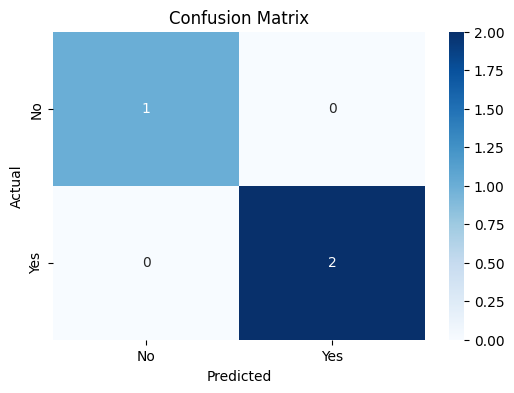

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


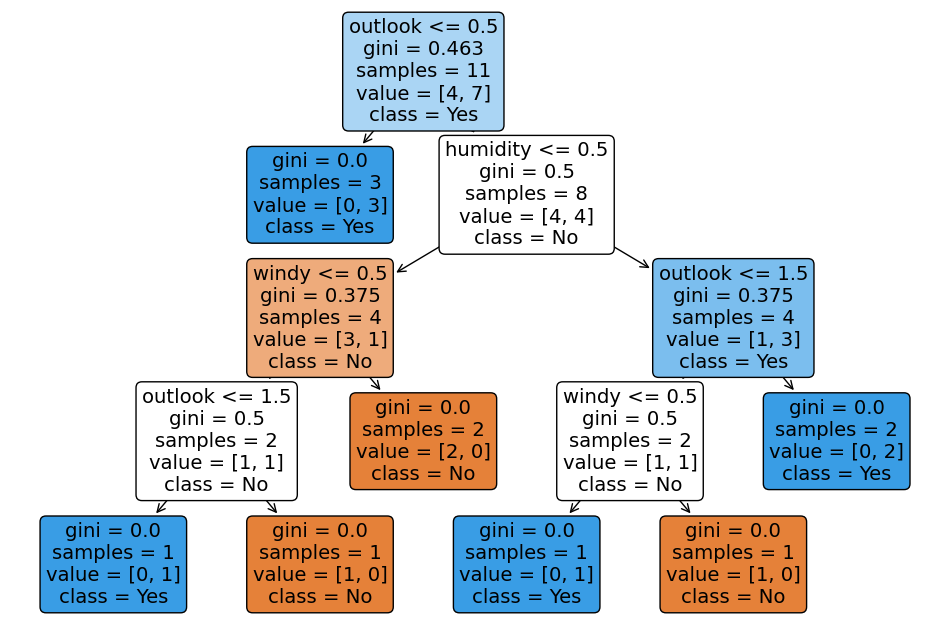

In [55]:
plt.figure(figsize=(12, 8))  # Ukuran gambar
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()